In [1]:
import os
import sys

In [4]:
sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [5]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [6]:
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

In [7]:
networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

In [8]:
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


===========iteration:0===========
std=0.01:2.3024936015005366
Xavier:2.290458017676026
He:2.4771880796829655
===========iteration:100===========
std=0.01:2.3023810246229712
Xavier:2.2225129738644163
He:1.506193815751479
===========iteration:200===========
std=0.01:2.303656030009769
Xavier:2.1063522957605127
He:0.7200801681021831
===========iteration:300===========
std=0.01:2.3012249340428257
Xavier:1.8286491672166945
He:0.5763020505323176
===========iteration:400===========
std=0.01:2.302257981296611
Xavier:1.3536122569753994
He:0.5403940438853349
===========iteration:500===========
std=0.01:2.3026673924618364
Xavier:0.8032355145280214
He:0.2792884826454047
===========iteration:600===========
std=0.01:2.3038696336983344
Xavier:0.5960696814262679
He:0.22560529866579057
===========iteration:700===========
std=0.01:2.299273466686901
Xavier:0.5801143726262266
He:0.310250044611054
===========iteration:800===========
std=0.01:2.3014372688105937
Xavier:0.5658695732323156
He:0.3453777332200700

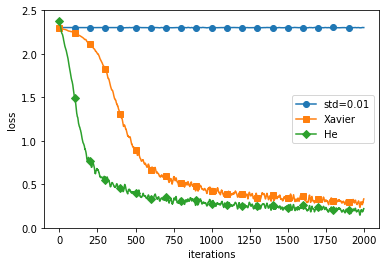

In [9]:
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()